# Forecasting

Data source : https://ourworldindata.org/grapher/air-passengers-carried

## Imports

In [3]:
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def unique(liste):
    
    unique = []

    for e in liste:
        if e not in unique:
            unique.append(e)
            
    return unique


def load_data(filepath, country):

    Entity=[]
    Code = []
    Year=[]
    Passengers=[]


    with open(filepath, newline='') as file:

        filereader = csv.reader(file, delimiter=',', quotechar='"')

        for row in filereader:

            if row[1] == country :
            
                Entity.append(row[0])
                Code.append(row[1])
                Year.append(row[2])
                Passengers.append(row[3])
                
    return Entity, Code, Year, Passengers

## Variables

In [17]:
x = np.array([5, 15, 25, 35, 45, 55, 65, 75]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38, 60, 70])

# x = np.linspace(start = 1, stop=100, num=50)
# Y = np.linspace(start = 1, stop=100, num=50)


In [5]:

Entity_fra, Code_fra, Year_fra, Passengers_fra = load_data(filepath='data_input/air-passengers-carried.csv', country='FRA')
Entity_usa, Code_usa, Year_usa, Passengers_usa = load_data(filepath='data_input/air-passengers-carried.csv', country='FRA')

data_fra = zip(Year_fra, Passengers_fra)
data_usa = zip(Year_usa, Passengers_usa)

print(Entity_fra[:1], Entity_fra[-1:])
print(Code_fra[:1], Code_fra[-1:])
print(Year_fra[:1], Year_fra[-1:])
print(Passengers_fra[:1], Passengers_fra[-1:])


['France'] ['France']
['FRA'] ['FRA']
['1970'] ['2021']
['9108000'] ['32000528']


## Linear regression

In [7]:
from sklearn.linear_model import LinearRegression

In [21]:
pass_fra = np.array(Passengers_fra, dtype='int').reshape(-1, 1)
year_fra = np.array(Year_fra, dtype='int').reshape(-1, 1)
pass_usa = np.array(Passengers_usa, dtype='int').reshape(-1, 1)
year_usa = np.array(Year_usa, dtype='int').reshape(-1, 1)

In [ ]:
lr = LinearRegression().fit(year_fra, pass_fra,)

r_sq = lr.score(year_fra, pass_fra)
print(f"coefficient of determination: {r_sq}")

print(f"intercept: {lr.intercept_}")

print(f"slope: {lr.coef_}")

y_pred = lr.predict(year_fra)
print(f"predicted response:\n{y_pred[:5]}")

coefficient of determination: 0.7987817361077296
intercept: [-2.23769636e+09]
slope: [[1140927.49304192]]
predicted response:
[[ 9930805.08127737]
 [11071732.57431936]
 [12212660.06736135]
 [13353587.56040335]
 [14494515.05344486]]


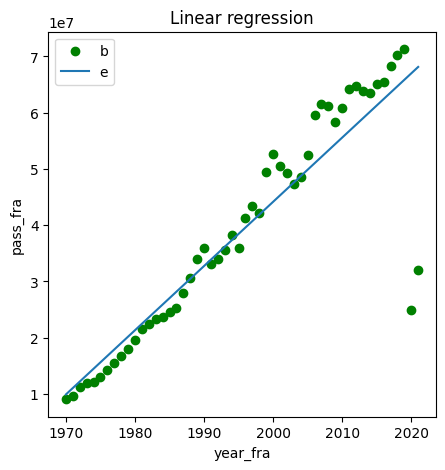

In [30]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(year_fra, pass_fra, label='raw data', color='g')
ax.plot(year_fra, y_pred, label='regression')
ax.set_xlabel('year_fra')
ax.set_ylabel('pass_fra')

ax.legend('best')
plt.title("Linear regression")
plt.savefig('example_LinearRegresion.png');

## Moving Average

In [34]:
pass_fra = np.array(Passengers_fra, dtype='int')
year_fra = np.array(Year_fra, dtype='int')
pass_usa = np.array(Passengers_usa, dtype='int')
year_usa = np.array(Year_usa, dtype='int')

In [58]:
def moving_avg_01(x, window_size):
    
    window = np.ones(int(window_size))/float(window_size)
    ma_vec = np.convolve(x, window, 'same')
    
    return ma_vec

def moving_avg_02(x, window_size):
    
    cumsum = np.cumsum(np.insert(window_size, 0, 0))
    ma_vec = (cumsum[window_size:] - cumsum[:-window_size]) / float(window_size) 
    
    return ma_vec

In [62]:
#y_pred = moving_avg_01(x=pass_fra, window_size=3)
y_pred = moving_avg_02(x=pass_fra, window_size=3)

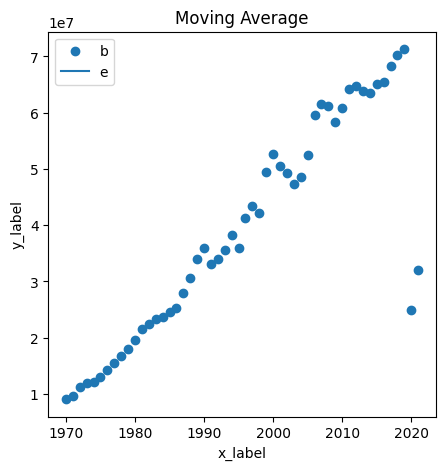

In [65]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(year_fra, pass_fra, label='raw data')
ax.plot(y_pred, label='moving average')
ax.set_xlabel('x_label')
ax.set_ylabel('y_label')

ax.legend('best')
plt.title("Moving Average")
plt.savefig('example_MovingAverage.png');

## Polynomial Regression

## Simple Exponential smoothing

## Double exponential smoothing : Holt

## Triple exponential smoothing : Holt-Winter

## Croston